In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
from qiskit.quantum_info import SparsePauliOp, Statevector

#definiamo l'evoluzione temporale nel caso classico
def U_Heis(n_spins,t):
    H = H_Heis(n_spins).to_matrix()
    return la.expm(-1j*t*H)

def H_Heis(N):
    #usiamo J = 1
    XX_tuples = [("XX", [i, i + 1], 1) for i in range(0, N-1)]
    YY_tuples = [("YY", [i, i + 1], 1) for i in range(0, N-1)]
    ZZ_tuples = [("ZZ", [i, i + 1], 1) for i in range(0, N-1)]

    #col metodo from_sparse_list di SparsePauliOp definiamo l'hamiltoniana
    hamiltonian = SparsePauliOp.from_sparse_list([*XX_tuples, *YY_tuples, *ZZ_tuples], N)

    return hamiltonian

#La curva esatta

et_steps = 100 #la curva esatta deve essere accurata
#definiamo il tempo in cui facciamo evolvere il sistema
dt = 3

#definiamo il numero di time steps, creiamo ts e definiamo "prj"
t_steps = 12 
#definiamo il tempo in cui facciamo evolvere il sistema
dt = 3
ts = np.linspace(0, dt, t_steps) 

#generiamo una spaziatura lineare di t_steps nell'intervallo [0, 3]
et_ts = np.linspace(0, dt, et_steps) 
#011
initial_state = Statevector.from_label('011').data
exact_curve = [np.abs((initial_state @ U_Heis(3,float(t)) @ initial_state))**2 for t in et_ts]

In [5]:
array_exact = [1.0, 0.744, 0.337, 0.224, 0.248, 0.161, 0.117, 0.214, 0.243, 0.238, 0.512, 0.993]
array_transpilation = [1.005, 0.043, 0.095, 0.078, 0.109, 0.158, 0.337, 0.331, 0.321, 0.187, 0.221, 0.263]
array_notranspilationVL = [0.884, 0.593, 0.253, 0.167, 0.195, 0.328, 0.319, 0.253, 0.188, 0.164, 0.163, 0.202]
array_transpilationVL = [0.999, 0.622, 0.239, 0.154, 0.149, 0.129, 0.213, 0.319, 0.211, 0.171, 0.160, 0.158]
array_ZNE = [np.float64(1.0636017602805319), np.float64(0.36845858145781635), np.float64(0.32676772888397165), np.float64(0.15542387632226357), np.float64(0.2299702078385035), np.float64(0.019049333580060654), np.float64(0.150123196441741), np.float64(0.10615844360167499), np.float64(0.19271422259161344), np.float64(0.2318326069669665), np.float64(0.27062883242290037), np.float64(0.5032840446290506)]

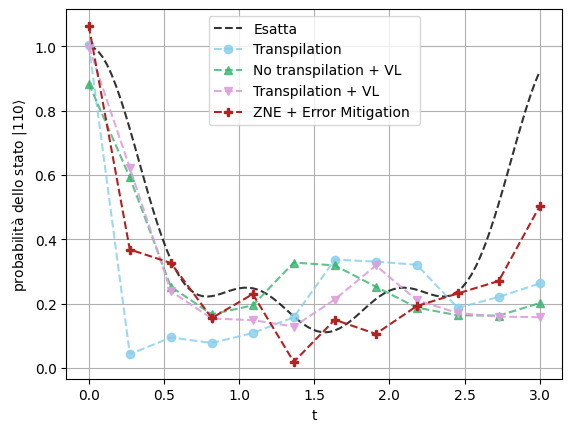

In [54]:

plt.plot(et_ts, exact_curve,linestyle="dashed",color="black",alpha=0.8,label="Esatta")
plt.plot(ts, array_transpilation,'o--', color="skyblue", alpha=0.8, label="Transpilation ")
plt.plot(ts, array_notranspilationVL,'^--', color="mediumseagreen",alpha=0.8, label="No transpilation + VL ")
plt.plot(ts, array_transpilationVL,'v--', color="plum",alpha=0.9, label="Transpilation + VL")
plt.plot(ts, array_ZNE,'P--', color="firebrick", label="ZNE + Error Mitigation ")
plt.xlabel('t')
plt.ylabel(r'probabilità dello stato $|110\rangle$')
plt.legend()
plt.grid()
plt.savefig('../png/qpu_final.png')
plt.show()